<a href="https://colab.research.google.com/github/alimoorreza/CS195-Fall24-Notebook-5/blob/main/cs195_part_1_inference_using_pretrained_FCN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# util function:
def get_imagenet_mean_std_normalized():
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    return mean, std

## **Evaluating a pretrained semantic segmentation model on a random image to assess its performance.**

> ### __PyTorch official repository provides semantic segmentation implementation for the following models:__
  * [Fully Convolutional network (FCN)](https://pytorch.org/vision/main/models/fcn.html)
    * We covered this model in class; refer to the slides.
    * PyTorch offers two variants of FCN:
      * [**fcn_resnet50**: Fully-Convolutional Network model with a ResNet-50 backbone](https://pytorch.org/vision/main/models/generated/torchvision.models.segmentation.fcn_resnet50.html)
      * [**fcn_resnet101**: Fully-Convolutional Network model with a ResNet-101 backbone](https://pytorch.org/vision/main/models/generated/torchvision.models.segmentation.fcn_resnet101.html)
  * [Rethinking Atrous Convolution for Semantic Image Segmentation (DeepLabv3)](https://pytorch.org/vision/main/models/generated/torchvision.models.segmentation.deeplabv3_resnet101.html)
    * Although we did not cover it in class, another effective semantic segmentation model emerged shortly after FCN.
    * PyTorch offers three variants of DeepLabv3:      
      * [**deeplabv3_resnet50**: DeepLabv3 model with a ResNet-50 backbone](https://pytorch.org/vision/main/models/generated/torchvision.models.segmentation.deeplabv3_resnet50.html)
      * [**deeplabv3_resnet101**: DeepLabv3 model with a ResNet-101 backbone](https://pytorch.org/vision/main/models/generated/torchvision.models.segmentation.deeplabv3_resnet101.html)
      * [**deeplabv3_mobilenet_v3_large**: DeepLabv3 model with a MobileNetV3-Large backbone](https://pytorch.org/vision/main/models/generated/torchvision.models.segmentation.deeplabv3_mobilenet_v3_large.html)


In [ ]:
import matplotlib.pyplot as plt
import PIL

def visualize_semantic_map(output_predictions, input_image):
  # create a color pallette, selecting a color for each class (these are random color to be assigned to each predicted region)
  palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
  colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
  colors = (colors % 255).numpy().astype("uint8")

  # plot the semantic segmentation predictions of 21 classes in each color
  #r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
  r = PIL.Image.fromarray(output_predictions.byte().cpu().numpy())
  r.putpalette(colors)

  plt.imshow(r)
  plt.title('Segmentation labels shown in different random colors')

In [ ]:
import torch
import torchvision.transforms as transform
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
print("device = ", device)

device =  cuda


In [ ]:
mean, std = get_imagenet_mean_std_normalized()
preprocess = transform.Compose([
    transform.ToTensor(),
    transform.Normalize(mean=mean, std=std),
])


In [ ]:
def predict_and_visualize(model, img_tensor):
  # visualize the prediction
  model.eval()
  output              = model(img_tensor)['out'][0]
  print(output.shape)                               # it should be a tensor of [num_classes, h, w]
  output_predictions  = output.argmax(0)            # for each pixel location, retain the max value accross the channel which corresponds to the class label at that position
  print(output_predictions.shape)                   # it should be a tensor of [h, w]
  visualize_semantic_map(output_predictions, img)


Text(0.5, 1.0, 'Input RGB image')

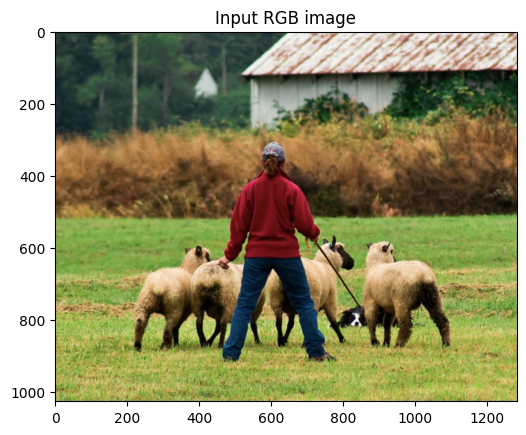

In [ ]:
img                 = PIL.Image.open('/content/drive/MyDrive/cs195_fall24/semseg/sample_images/deeplab1.png')
img                 = img.convert("RGB")
img_tensor          = preprocess(img).unsqueeze(0).to(device)
plt.imshow(img)
plt.title('Input RGB image')


torch.Size([21, 1026, 1282])
torch.Size([1026, 1282])


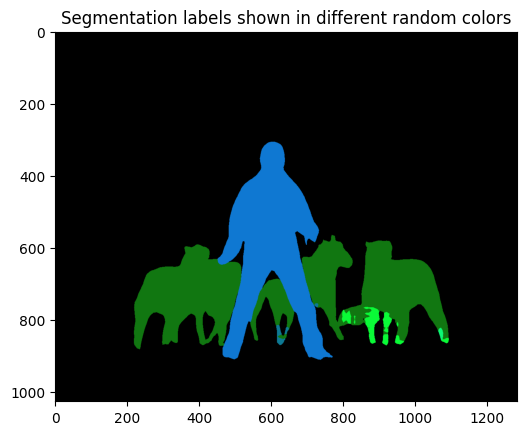

In [ ]:
predict_and_visualize(model, img_tensor)

##__Testing pretrained semantic segmentation model using a sample image from our Underwater Segmentation Dataset (UWSv1)__
* Step 1: visualizing the RGB image
* Step 2: visualizing the manually annotated ground truth
* Step 3: visualizing the predicted semantic segmentation map using pretrained FCN-resnet50 model from **torchvision**


Text(0.5, 1.0, 'Input RGB image')

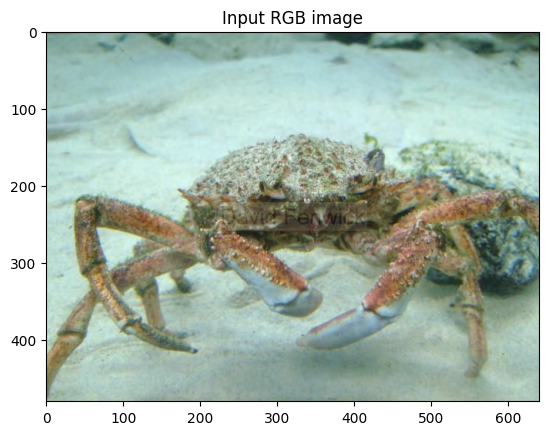

In [ ]:
# Step 1: visualizing the RGB image
img                 = PIL.Image.open('/content/drive/MyDrive/cs195_fall24/semseg/sample_images/Crab_25_rgb.png')
img                 = img.convert("RGB")
img_tensor          = preprocess(img).unsqueeze(0).to(device)
plt.imshow(img)
plt.title('Input RGB image')

Text(0.5, 1.0, 'Manually annotated ground truth image')

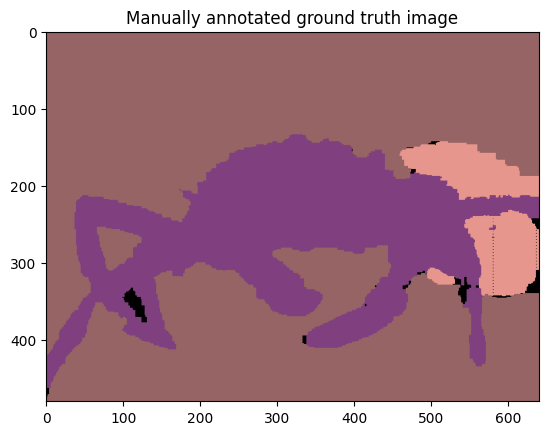

In [ ]:
# Step 2: visualizing the manually annotated ground truth
gt                 = PIL.Image.open('/content/drive/MyDrive/cs195_fall24/semseg/sample_images/Crab_25.png')
gt                 = gt.convert("RGB")
plt.imshow(gt)
plt.title('Manually annotated ground truth image')


torch.Size([21, 480, 640])
torch.Size([480, 640])


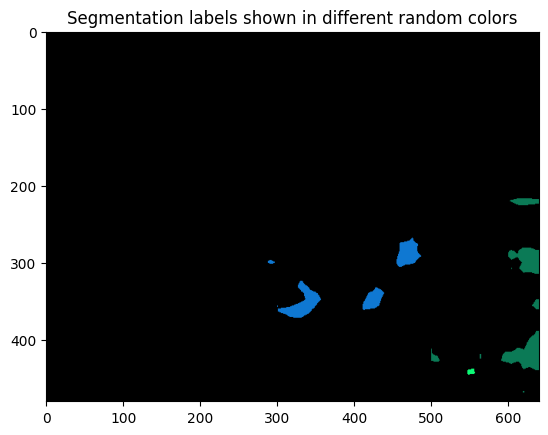

In [ ]:
# Step 3: visualizing the predicted semantic segmentation map using pretrained FCN-resnet50 model from torchvision
predict_and_visualize(model, img_tensor)

#### Observe that **fcn_resnet50** had difficulty segmenting most of the meaningful regions, as the pre-trained model was not exposed to underwater images featuring underwater animals during training.

Text(0.5, 1.0, 'Input RGB image')

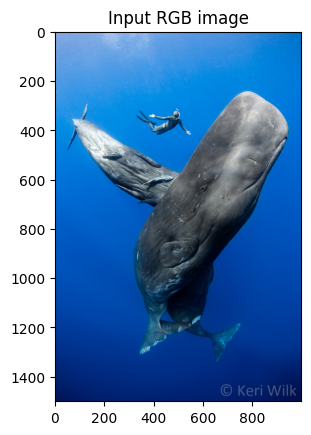

In [ ]:
# Step 1: visualizing the RGB image
img                 = PIL.Image.open('/content/drive/MyDrive/cs195_fall24/semseg/sample_images/Whale_14_rgb.png')
img                 = img.convert("RGB")
img_tensor          = preprocess(img).unsqueeze(0).to(device)
plt.imshow(img)
plt.title('Input RGB image')

Text(0.5, 1.0, 'Manually annotated ground truth image')

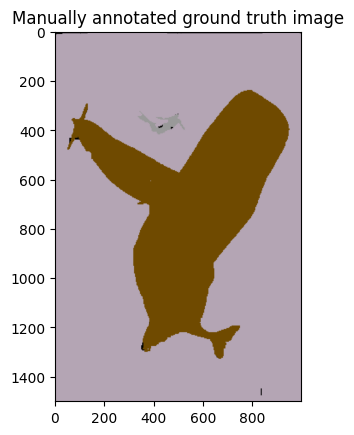

In [ ]:
# Step 2: visualizing the manually annotated ground truth
gt                 = PIL.Image.open('/content/drive/MyDrive/cs195_fall24/semseg/sample_images/Whale_14.png')
gt                 = gt.convert("RGB")
plt.imshow(gt)
plt.title('Manually annotated ground truth image')


torch.Size([21, 1500, 1000])
torch.Size([1500, 1000])


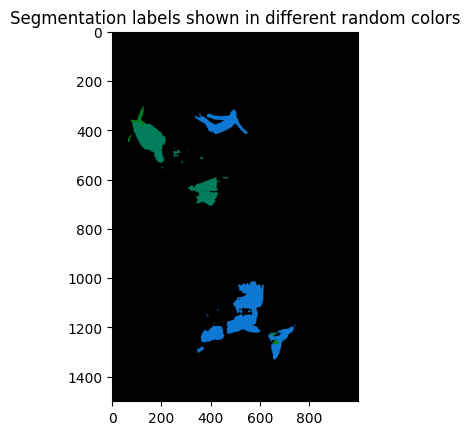

In [ ]:
# Step 3: visualizing the predicted semantic segmentation map using pretrained FCN-resnet50 model from torchvision
predict_and_visualize(model, img_tensor)

####Notice that **fcn_resnet50** struggled to segment most of the meaningful regions. However, it successfully identified the human, likely because the pre-trained model was trained on numerous images featuring humans.

# __Task 1.1:__ (3 points)
### **Evaluating a pretrained semantic segmentation model on a random image to assess its segmentation performance.**
- **Step 1:** Download a random outdoor image featuring common objects such as 'cat,' 'dog,' 'bike,' and 'person,' then upload it to your google drive
- **Step 2:**  Perform inference using **fcn_resnet50** pretrained semantic segmentation model as shown above
- **Step 3:**  What are your overall observations from the prediction? Share your remarks.

In [ ]:
# your code
# ...
# ...
# ...

# __Task 1.2:__ (4 points)
### **Evaluating a pretrained semantic segmentation model on randomly selected images from UWSv1 dataset to assess its segmentation performance.**
* **Step 1:** Select a sample image from the UWSv1 dataset and perform inference using pretrained semantic segmentation model.
  * You can download UWSv1 from [here](https://drive.google.com/uc?id=155Vg3iOTK3aed11LXC2lFQBxhdimfuZB)
* **Step 2:**For full credit you need to apply at least three pre-trained semantic segmentation models such as:
    * [**fcn_resnet50**: Fully-Convolutional Network model with a ResNet-50 backbone](https://pytorch.org/vision/main/models/generated/torchvision.models.segmentation.fcn_resnet50.html)
    * [**fcn_resnet101**: Fully-Convolutional Network model with a ResNet-101 backbone](https://pytorch.org/vision/main/models/generated/torchvision.models.segmentation.fcn_resnet101.html)
    * [**deeplabv3_resnet50**: DeepLabv3 model with a ResNet-50 backbone](https://pytorch.org/vision/main/models/generated/torchvision.models.segmentation.deeplabv3_resnet50.html)
    * [**deeplabv3_resnet101**: DeepLabv3 model with a ResNet-101 backbone](https://pytorch.org/vision/main/models/generated/torchvision.models.segmentation.deeplabv3_resnet101.html)
    * [**deeplabv3_mobilenet_v3_large**: DeepLabv3 model with a MobileNetV3-Large backbone](https://pytorch.org/vision/main/models/generated/torchvision.models.segmentation.deeplabv3_mobilenet_v3_large.html)

* **Step 3:**  What are your overall observations from the prediction? Share your remarks.


In [ ]:
# your code
# ...
# ...
# ...